# Michigan Neighborhood Segmentation

## Author
### Teja Kodali


# Importing Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
# # define the dataframe columns
# column_names = ['Areas', 'PostCode', 'Latitude', 'Longitude'] 

# # instantiate the dataframe
# neighborhoods = pd.DataFrame(columns=column_names)

# Reading the zipcode csv file 

In [3]:
neighborhoods1 = pd.read_csv('zipcode.csv')
neighborhoods1.head()

,Area,PostCode,Lat,Lon
0,ADDISON,49220,42.007252,-84.322649
1,ADRIAN,49221,41.885177,-84.059029
2,ALBION,49224,42.293696,-84.752448
3,ALGONAC,48001,42.643334,-82.583495
4,ALLEN,49227,41.938728,-84.752448


In [4]:
print(" The dataset has " + str(len(neighborhoods1)) + " unique postcodes")

 The dataset has 904 unique postcodes


In [5]:
neighborhoods = neighborhoods1

In [6]:
print('The dataframe has {} unique areas.'.format(
        len(neighborhoods['Area'].unique()),
    )
)

The dataframe has 755 unique areas.


# Visualizing the Michigan postal codes from the dataset

In [7]:
address = 'Lansing, MI'

geolocator = Nominatim(user_agent="mi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lansing,MI are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lansing,MI are 42.7337712, -84.5553805.


In [8]:
# create map of New York using latitude and longitude values
map_detroit = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, area, postcode in zip(neighborhoods['Lat'], neighborhoods['Lon'], neighborhoods['Area'], neighborhoods['PostCode']):
    label = '{}, {}'.format(postcode, area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_detroit)  
    
map_detroit

# Read the michigan venues csv file generated on Data Collection stage

In [9]:
michigan_venues = pd.read_csv('michigan2.csv')

In [10]:
len(michigan_venues)

16681

In [11]:
x = michigan_venues.groupby("Neighborhood")
len(x)

833

# Filtering out the neighborhood which have less than 5 venues within 2 miles

In [12]:
michigan_venues = x.filter(lambda x: x['Neighborhood'].count() > 4)
len(michigan_venues)

16118

In [13]:
print('There are {} uniques categories.'.format(len(michigan_venues['Venue Category'].unique())))

There are 425 uniques categories.


# One hot encoding of the dataset

In [14]:
# one hot encoding
michigan_onehot = pd.get_dummies(michigan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
michigan_onehot['Neighborhood'] = michigan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [michigan_onehot.columns[-1]] + list(michigan_onehot.columns[:-1])
michigan_onehot = michigan_onehot[fixed_columns]

michigan_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great 

In [15]:
michigan_onehot.shape

(16118, 425)

In [16]:
michigan_grouped = michigan_onehot.groupby('Neighborhood').mean().reset_index()
michigan_grouped.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great 

# Plot correlation between features

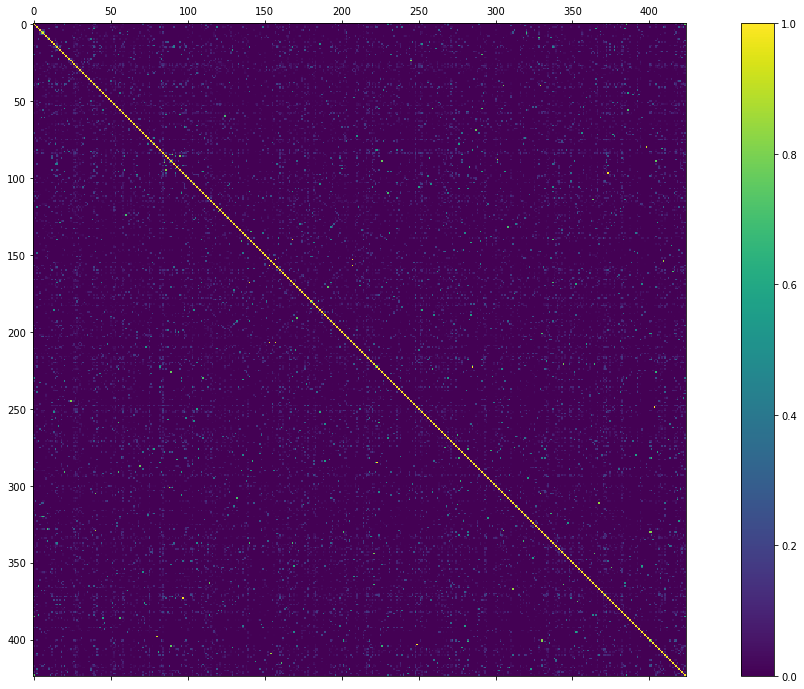

In [17]:
import matplotlib.pyplot as plt
import pandas
import numpy

correlations = michigan_grouped.corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

# Get the Top 5 venues from any neighborhood

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 5

for hood in michigan_grouped['Neighborhood']:
#     print("----"+hood+"----")
    temp = michigan_grouped[michigan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
#     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#     print('\n')

In [20]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = michigan_grouped['Neighborhood']

for ind in np.arange(michigan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(michigan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,ADA-49301,Park,Gun Range,Optical Shop,Chinese Restaurant,Golf Course
1,ADDISON-49220,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping
2,ADRIAN-49221,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place
3,ALDEN-49612,Gift Shop,Breakfast Spot,Bakery,Bar,Harbor / Marina
4,ALGONAC-48001,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout


In [21]:
michigan_grouped.shape[0]

598

In [22]:
michigan_grouped.tail()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great 

# Dimensionality Reduction using PCA

Text(0, 0.5, 'cumulative explained variance')

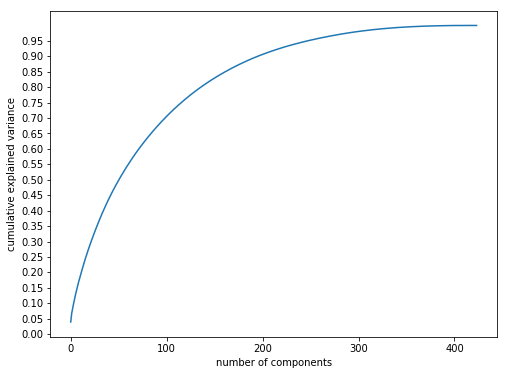

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

neigh_name = michigan_grouped['Neighborhood']
michigan_grouped_clustering = michigan_grouped.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(michigan_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
# plt.xticks(np.arange(0, 450, step=30))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [24]:
pca = PCA(n_components=200)
dataset = pca.fit_transform(data_rescaled)

In [25]:
test_data = dataset[589:]
dataset = dataset[:588]

In [26]:
type(dataset)

numpy.ndarray

# Find cluster number from elbow method

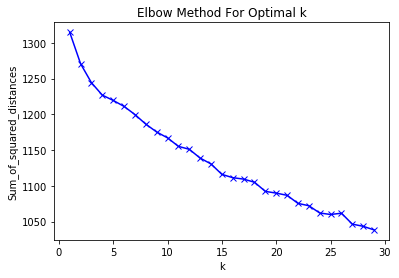

In [27]:
Sum_of_squared_distances = []
K = range(1, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Finding cluster number from Silhouette method

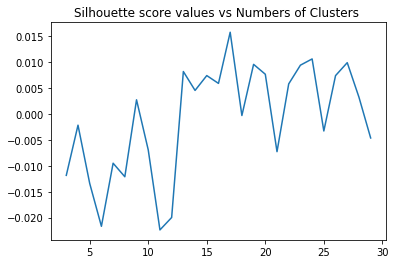

Optimal number of components is:
17


In [28]:
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
 
obs = dataset.copy() 
# obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()
 
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
#     print("Number Of Clusters:")
#     print(i)
#     print("Silhouette score value")
#     print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)


In [29]:
michigan_grouped_clustering = dataset.copy()

In [30]:
michigan_grouped_clustering

array([[ 0.10230471, -0.21112893, -0.1490221 , ..., -0.0336561 ,
         0.01876917, -0.07012308],
       [-0.31066651,  0.07191443,  0.11216778, ..., -0.04293223,
         0.02434141, -0.06178916],
       [ 0.25616227,  0.09498743, -0.00174393, ...,  0.02307818,
         0.01035439,  0.00195726],
       ...,
       [-0.3875017 , -0.33213454, -0.26680047, ..., -0.18016697,
         0.08155723, -0.02289088],
       [-0.17791153, -0.09622511, -0.02473459, ...,  0.00171257,
        -0.05873366, -0.04763764],
       [-0.16754572,  0.37410603,  0.07596038, ...,  0.0287131 ,
         0.06256054,  0.00130504]])

# Fitting K-means algorithm

In [31]:
# set number of clusters
kclusters = 15

# michigan_grouped_clustering = michigan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(michigan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Finding the mean distance from cluster centroids to cluster points

In [32]:
# new_data = michigan_grouped_clustering.copy()
# new_data.insert(0, 'klabels', kmeans.labels_)
# new_data
centroids
frequency = []
cumsum = []
means = []
import math  
for i in range(0, 15):
    cumsum.append(0)
    frequency.append(0)

for i in range(0, len(michigan_grouped_clustering)):
    singlePoint = michigan_grouped_clustering[i];
    singleCentroid = centroids[labels[i]]
    sqrtRoot = 0;
    for j in range(0, len(singlePoint)):
        sqrtRoot+= ((singlePoint[j]-singleCentroid[j])*(singlePoint[j]-singleCentroid[j]));
    cumsum[labels[i]] += math.sqrt(sqrtRoot);
    frequency[labels[i]] += 1;
for i in range(0, 15):
    means.append(cumsum[i]/frequency[i])


In [33]:
means

[1.3475594105990052,
 1.2105565956924365,
 1.0969447013874825,
 1.214585215181222,
 1.5505145727316731,
 1.4747407896751437,
 1.543176745709825,
 1.165476405923486,
 1.384265054439448,
 2.42434975903054e-19,
 1.5277985416168491,
 1.3156846260156387,
 1.44341081156426,
 0.9548493279837862,
 1.2182624467055065]

# Finding the distance from cluster centroids to new points to assign into a cluster

In [34]:
new_points = []
for i in range(0, len(test_data)):
    singlePoint = test_data[i]
    distancesFromMean = np.zeros(15)
    for j in range(0, len(centroids)):
        singleCentroids = centroids[j];
        sqrtRoot = 0;
        for k in range(0, len(singlePoint)):
            sqrtRoot+= ((singlePoint[k]-singleCentroids[k])*(singlePoint[k]-singleCentroids[k]));
        distancesFromMean[j] = math.sqrt(sqrtRoot)
        
    print(distancesFromMean)
    minIndex = list(distancesFromMean).index(min(list(distancesFromMean)))
    print("Test data " + str(i) + " will be in cluster : " + str(minIndex))

[1.43878759 1.25592593 1.61540606 1.25458498 1.56607972 2.45468995
 1.25518136 1.27286001 1.88516718 3.20322021 1.22810589 2.25479603
 1.30639094 1.84164958 1.6038537 ]
Test data 0 will be in cluster : 10
[1.51020519 1.37828847 1.72108878 1.43525722 1.65790348 2.40509165
 1.38544952 1.3929823  1.94375877 3.21917248 1.36349419 2.30622467
 1.30607821 1.92393704 1.65436369]
Test data 1 will be in cluster : 12
[1.80763131 1.96690005 2.11398982 2.02179185 1.92819052 2.80227096
 1.75558782 1.84612208 2.19550998 3.55488216 1.82265825 2.52176181
 1.95037532 2.21826068 2.18126128]
Test data 2 will be in cluster : 6
[2.07355316 2.07882889 2.26374953 2.07137187 1.88689143 2.83838379
 1.95981283 2.05019949 2.35887977 3.56916711 2.04049431 2.70097257
 2.06640396 2.39899888 2.26227898]
Test data 3 will be in cluster : 4
[1.96144137 1.9958736  2.13515676 2.10284829 1.99685898 2.65431268
 1.85476635 1.89038882 2.27150815 3.59841008 1.95652954 2.55015107
 2.02963848 2.27139649 2.19626317]
Test data 4 w

# Visualizing the clusters

In [35]:
z = michigan_grouped.copy()
z = z[0:588]
z.insert(0, 'Cluster Labels', kmeans.labels_)

In [36]:
data = neighborhoods_venues_sorted.copy()
# dropping null value columns to avoid errors 
data.dropna(inplace = True) 
  
# new data frame with split value columns 
new = data["Neighborhood"].str.split("-", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
data["Area"]= new[0] 
  
# making seperate last name column from new data frame 
data["PostCode"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["Neighborhood"], inplace = True) 
  
# df display 
data.head()


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area,PostCode
0,Park,Gun Range,Optical Shop,Chinese Restaurant,Golf Course,ADA,49301
1,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON,49220
2,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN,49221
3,Gift Shop,Breakfast Spot,Bakery,Bar,Harbor / Marina,ALDEN,49612
4,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC,48001


In [40]:
neighborhoods_venues_sorted = data[0:588].copy()

In [41]:
neighborhoods1['PostCode'] = neighborhoods1['PostCode'].astype(int)
neighborhoods_venues_sorted['PostCode'] = neighborhoods_venues_sorted['PostCode'].astype(int)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

michigan_merged = neighborhoods1.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
michigan_merged = michigan_merged.merge(neighborhoods_venues_sorted, on='PostCode', how='left')

michigan_merged.head() # check the last columns!

,Area_x,PostCode,Lat,Lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,ADDISON,49220,42.007252,-84.322649,14.0,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
1,ADRIAN,49221,41.885177,-84.059029,10.0,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
2,ALBION,49224,42.293696,-84.752448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALGONAC,48001,42.643334,-82.583495,12.0,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
4,ALLEN,49227,41.938728,-84.752448,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# export_csv = michigan_venues.to_csv (r'E:\michigan900.csv', index = None, header=True)

In [44]:
michigan_merged = michigan_merged.dropna(subset=['Area_y', 'Cluster Labels'])
michigan_merged.head()

,Area_x,PostCode,Lat,Lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,ADDISON,49220,42.007252,-84.322649,14.0,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
1,ADRIAN,49221,41.885177,-84.059029,10.0,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
3,ALGONAC,48001,42.643334,-82.583495,12.0,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
5,ALLEN PARK,48101,42.242719,-83.218476,6.0,American Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,ALLEN PARK
7,ALMONT,48003,42.945013,-83.057616,7.0,Bakery,Pizza Place,Diner,Bowling Alley,Gas Station,ALMONT


In [45]:
len(michigan_merged)

588

In [46]:
address = 'Lansing,MI'

geolocator = Nominatim(user_agent="mi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Detroit,MI are 42.7337712, -84.5553805.


In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, pos, cluster in zip(michigan_merged['Lat'], michigan_merged['Lon'], michigan_merged['Area_x'],michigan_merged['PostCode'], michigan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + " " + str(pos) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
len(michigan_merged)

588

In [49]:
z.head()

,Cluster Labels,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Groce

In [50]:
y = z["Cluster Labels"]
names = z["Neighborhood"]
z.drop(columns =["Neighborhood"], inplace = True) 
z.drop(columns =["Cluster Labels"], inplace = True) 

In [51]:
z.head()

,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Othe

In [52]:
y.head()

0     6
1    14
2    10
3    12
4    12
Name: Cluster Labels, dtype: int32

In [53]:
names.head()

0        ADA-49301
1    ADDISON-49220
2     ADRIAN-49221
3      ALDEN-49612
4    ALGONAC-48001
Name: Neighborhood, dtype: object

# Visualization of the clusters using PCA

In [54]:
from sklearn.decomposition import PCA
pca_data = z.copy()

In [55]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(pca_data)
print(pca_data.shape)
print(projected.shape)

(588, 424)
(588, 2)


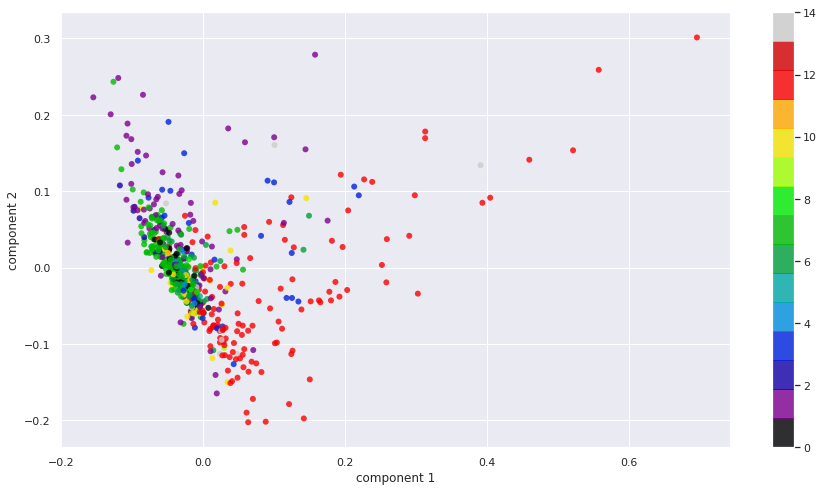

In [56]:
import seaborn as sns; sns.set()
plt.figure(figsize=(15,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral', 15))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Exploring the top venues of each clusters

In [57]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 0, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
10,48105,Shipping Store,Park,Pizza Place,American Restaurant,Bank,ANN ARBOR
20,48415,Clothing Store,Fast Food Restaurant,Diner,Kitchen Supply Store,Kids Store,BIRCH RUN
24,48302,Sandwich Place,Pizza Place,Coffee Shop,Golf Course,Café,BLOOMFIELD HILLS
53,48122,Mexican Restaurant,Coffee Shop,Discount Store,Sandwich Place,Cosmetics Shop,MELVINDALE
97,48239,Pizza Place,Pharmacy,Grocery Store,Coffee Shop,Diner,REDFORD
101,48130,Pizza Place,Park,Sandwich Place,Brewery,Fast Food Restaurant,DEXTER
109,48334,Café,Thai Restaurant,Chinese Restaurant,Italian Restaurant,Golf Course,FARMINGTON
119,48507,Mexican Restaurant,Italian Restaurant,Burger Joint,Steakhouse,Fabric Shop,FLINT
120,48509,Sandwich Place,Fast Food Restaurant,Pharmacy,Pizza Place,Coffee Shop,BURTON
132,48480,American Restaurant,Fast Food Restaurant,Pizza Place,Pharmacy,Chinese Restaurant,GRAND BLANC


In [58]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 1, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
30,48416,American Restaurant,Bar,Grocery Store,Sandwich Place,Pizza Place,BROWN CITY
32,48418,Home Service,Pizza Place,Bank,Athletics & Sports,Fish & Chips Shop,BYRON
49,48422,Discount Store,Massage Studio,Gas Station,Fast Food Restaurant,American Restaurant,CROSWELL
60,48427,Park,Grocery Store,Tourist Information Center,Flower Shop,Fireworks Store,DECKERVILLE
169,48450,American Restaurant,Lake,Breakfast Spot,Bar,Convenience Store,LEXINGTON
176,48158,American Restaurant,Automotive Shop,Fast Food Restaurant,Pizza Place,Pharmacy,MANCHESTER
198,49256,Pizza Place,Grocery Store,American Restaurant,Sandwich Place,Discount Store,MORENCI
210,48164,Movie Theater,Park,Campground,General Entertainment,Pizza Place,NEW BOSTON
219,48168,Farm,Golf Course,Grocery Store,Pizza Place,Zoo,NORTHVILLE
224,49265,Lake,Construction & Landscaping,Scenic Lookout,Pizza Place,Hot Dog Joint,ONSTED


In [59]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 2, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
65,48204,Fast Food Restaurant,Discount Store,Fried Chicken Joint,Pizza Place,Sandwich Place,DETROIT
66,48205,Fast Food Restaurant,Pizza Place,Discount Store,Fried Chicken Joint,Grocery Store,DETROIT
74,48213,Fast Food Restaurant,Grocery Store,Pizza Place,Fried Chicken Joint,Discount Store,DETROIT
78,48217,Discount Store,Fast Food Restaurant,Sandwich Place,Convenience Store,Pizza Place,DETROIT
79,48218,Fast Food Restaurant,Discount Store,Grocery Store,Seafood Restaurant,Harbor / Marina,RIVER ROUGE
87,48227,Fast Food Restaurant,Grocery Store,Discount Store,Fried Chicken Joint,Sandwich Place,DETROIT
89,48229,Pizza Place,Fast Food Restaurant,Grocery Store,American Restaurant,Discount Store,ECORSE
92,48234,Discount Store,Fast Food Restaurant,Bar,Gay Bar,Fried Chicken Joint,DETROIT
96,48238,Fast Food Restaurant,Discount Store,Sandwich Place,Fried Chicken Joint,American Restaurant,DETROIT
133,49240,Construction & Landscaping,Fried Chicken Joint,Bar,Fast Food Restaurant,Fishing Spot,GRASS LAKE


In [60]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 3, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
28,49229,Ice Cream Shop,Bar,Garden,Athletics & Sports,Pizza Place,BRITTON
45,49236,Bar,American Restaurant,Gun Shop,Movie Theater,Sandwich Place,CLINTON
48,49237,Ice Cream Shop,Golf Course,Restaurant,Sandwich Place,Diner,CONCORD
124,48433,American Restaurant,Pizza Place,Ice Cream Shop,Park,Mexican Restaurant,FLUSHING
130,48438,Ice Cream Shop,Diner,IT Services,BBQ Joint,Golf Course,GOODRICH
143,49242,Lake,Golf Course,Record Shop,Ice Cream Shop,Bar,HILLSDALE
146,49246,Ice Cream Shop,Pizza Place,Construction & Landscaping,Food,Dessert Shop,HORTON
227,48463,American Restaurant,Ice Cream Shop,Grocery Store,Music Venue,Fast Food Restaurant,OTISVILLE
238,49272,Ice Cream Shop,Convenience Store,Discount Store,Golf Course,American Restaurant,PLEASANT LAKE
249,48059,Ice Cream Shop,Pizza Place,Grocery Store,Trail,State / Provincial Park,FORT GRATIOT


In [61]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 4, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
43,48017,Sushi Restaurant,Pizza Place,Greek Restaurant,Bar,Park,CLAWSON
55,48126,Middle Eastern Restaurant,Pizza Place,Coffee Shop,Bakery,Deli / Bodega,DEARBORN
56,48128,Coffee Shop,Middle Eastern Restaurant,Bakery,Mediterranean Restaurant,Gym / Fitness Center,DEARBORN
57,48125,American Restaurant,Coffee Shop,Sandwich Place,Convenience Store,Pharmacy,DEARBORN HEIGHTS
128,48135,Middle Eastern Restaurant,Chinese Restaurant,Pharmacy,Park,American Restaurant,GARDEN CITY
241,48323,Ice Cream Shop,Golf Course,Sandwich Place,Gym,Salon / Barbershop,WEST BLOOMFIELD
243,48326,Pizza Place,Hotel,Thai Restaurant,Coffee Shop,Grocery Store,AUBURN HILLS
283,48075,Mexican Restaurant,American Restaurant,Liquor Store,Burger Joint,Discount Store,SOUTHFIELD
284,48076,Coffee Shop,Greek Restaurant,American Restaurant,Sandwich Place,Cosmetics Shop,SOUTHFIELD
291,48080,Sandwich Place,American Restaurant,Deli / Bodega,Pizza Place,Greek Restaurant,SAINT CLAIR SHORES


In [62]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 5, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
86,48226,American Restaurant,Coffee Shop,Hotel,Steakhouse,Park,DETROIT
91,48233,Park,Diner,Steakhouse,Waterfront,Cocktail Bar,DETROIT
100,48243,American Restaurant,Coffee Shop,Steakhouse,Hotel,Greek Restaurant,DETROIT


In [63]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 6, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
5,48101,American Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,ALLEN PARK
9,48104,Coffee Shop,Park,Grocery Store,Pizza Place,Sandwich Place,ANN ARBOR
11,48108,Hotel,Coffee Shop,Sandwich Place,Rental Car Location,Mexican Restaurant,ANN ARBOR
12,48109,Coffee Shop,Hotel,Trail,American Restaurant,Gym / Fitness Center,ANN ARBOR
21,48009,American Restaurant,Coffee Shop,Burger Joint,Spa,Pizza Place,BIRMINGHAM
23,48301,Intersection,American Restaurant,Gym / Fitness Center,Coffee Shop,Lake,BLOOMFIELD HILLS
26,48114,Lake,Yoga Studio,American Restaurant,Convenience Store,Coffee Shop,BRIGHTON
27,48116,American Restaurant,Coffee Shop,Supermarket,Furniture / Home Store,Italian Restaurant,BRIGHTON
38,48015,American Restaurant,Bar,Sandwich Place,Chinese Restaurant,Cosmetics Shop,CENTER LINE
52,48120,Middle Eastern Restaurant,Mexican Restaurant,Deli / Bodega,Sandwich Place,Bar,DEARBORN


In [64]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 7, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
7,48003,Bakery,Pizza Place,Diner,Bowling Alley,Gas Station,ALMONT
14,48005,Restaurant,Ice Cream Shop,Bakery,Park,Farm,ARMADA
19,48111,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,American Restaurant,IT Services,BELLEVILLE
34,48014,Ice Cream Shop,American Restaurant,Golf Course,Truck Stop,Sandwich Place,CAPAC
35,48117,Discount Store,Baseball Field,Furniture / Home Store,Sandwich Place,Pizza Place,CARLETON
39,48118,Pizza Place,Chinese Restaurant,Home Service,Gym / Fitness Center,American Restaurant,CHELSEA
42,48348,Park,Pharmacy,Pizza Place,Diner,Sandwich Place,CLARKSTON
46,48420,Bar,Racetrack,Discount Store,Cosmetics Shop,Diner,CLIO
51,48423,Discount Store,Convenience Store,Pizza Place,Coffee Shop,Café,DAVISON
67,48206,Discount Store,Pharmacy,Fast Food Restaurant,Bank,Performing Arts Venue,DETROIT


In [65]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 8, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
240,48322,Grocery Store,Sandwich Place,American Restaurant,Pizza Place,Breakfast Spot,WEST BLOOMFIELD
271,48072,Pizza Place,American Restaurant,Coffee Shop,Donut Shop,Burger Joint,BERKLEY
280,48025,Coffee Shop,Gym / Fitness Center,Burger Joint,Deli / Bodega,Golf Course,FRANKLIN
282,48034,Coffee Shop,Thai Restaurant,Diner,Pizza Place,American Restaurant,SOUTHFIELD
301,48084,Seafood Restaurant,Department Store,Clothing Store,Accessories Store,Furniture / Home Store,TROY


In [66]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 9, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
25,48304,Intersection,Golf Course,Theater,Lawyer,Steakhouse,BLOOMFIELD HILLS


In [67]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 10, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
1,49221,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
70,48209,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Food Truck,Italian Restaurant,DETROIT
71,48210,Mexican Restaurant,Sandwich Place,Discount Store,Pharmacy,Burger Joint,DETROIT
77,48216,Mexican Restaurant,Bar,Diner,Bakery,Restaurant,DETROIT
140,48030,Diner,Brewery,Pizza Place,Bar,Bowling Alley,HAZEL PARK
148,48140,Gym / Fitness Center,Convenience Store,Mexican Restaurant,Park,Diner,IDA
173,48150,Park,Diner,Pizza Place,Bar,Sandwich Place,LIVONIA
175,48154,Diner,Bar,Pizza Place,Gym,Sandwich Place,LIVONIA
233,49269,Hobby Shop,Intersection,Coffee Shop,Golf Course,Diner,PARMA
294,49285,Pizza Place,Sandwich Place,Diner,Construction & Landscaping,Hardware Store,STOCKBRIDGE


In [68]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 11, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
483,48824,Sushi Restaurant,Pizza Place,Bar,Coffee Shop,Ice Cream Shop,EAST LANSING
484,48825,Sushi Restaurant,Pizza Place,Coffee Shop,Ice Cream Shop,Bar,EAST LANSING
648,48912,American Restaurant,Pizza Place,Bar,Furniture / Home Store,Bakery,LANSING


In [69]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 12, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
3,48001,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
8,48103,Park,Golf Driving Range,Lake,Hobby Shop,Farm,ANN ARBOR
15,48412,Campground,Playground,Golf Course,Bed & Breakfast,Lake,ATTICA
16,48006,Park,Bar,Convenience Store,Diner,Trail,AVOCA
29,49230,Lake,Harbor / Marina,Beach,Golf Course,Fabric Shop,BROOKLYN
37,49233,Arts & Crafts Store,Motorcycle Shop,Convenience Store,Sports Bar,Lake,CEMENT CITY
40,49234,Lake,Gym,Cosmetics Shop,Paintball Field,Construction & Landscaping,CLARKLAKE
47,48421,Beach,Construction & Landscaping,Bar,American Restaurant,Pizza Place,COLUMBIAVILLE
50,48350,Park,Rest Area,Liquor Store,Arts & Crafts Store,Golf Course,DAVISBURG
61,49238,Fountain,Bar,Hunting Supply,Food Service,Food,DEERFIELD


In [70]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 13, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
41,48346,Sandwich Place,Bar,American Restaurant,Pharmacy,Italian Restaurant,CLARKSTON
108,48331,Pharmacy,Supermarket,Sandwich Place,Bakery,Diner,FARMINGTON
260,48309,Sandwich Place,American Restaurant,Pizza Place,Hotel,Coffee Shop,ROCHESTER
795,48603,Fast Food Restaurant,Sandwich Place,Pizza Place,American Restaurant,Supermarket,SAGINAW
799,48638,Sandwich Place,Pizza Place,American Restaurant,Pharmacy,Bank,SAGINAW


In [71]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 14, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,49220,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
177,49253,American Restaurant,Bar,Food & Drink Shop,Lake,Deli / Bodega,MANITOU BEACH
190,48145,Deli / Bodega,ATM,Intersection,Bar,Pub,LA SALLE
195,48166,Park,Ice Cream Shop,Building,Bar,Deli / Bodega,NEWPORT
274,48176,Ice Cream Shop,Tailor Shop,Park,Sandwich Place,Dog Run,SALINE
368,49101,Brewery,Food & Drink Shop,Bar,Park,Winery,BARODA
385,49022,Intersection,Construction & Landscaping,Vineyard,Food Stand,Deli / Bodega,BENTON HARBOR
689,49332,Discount Store,Deli / Bodega,Business Service,Sporting Goods Shop,Restaurant,MECOSTA
720,48748,Lake,Fishing Store,Italian Restaurant,Deli / Bodega,Diner,NATIONAL CITY
